# Clustering Crypto

In [36]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

### Deliverable 1: Preprocessing the Data for PCA

In [6]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
crypto_data = pd.read_csv('crypto_data.csv')
crypto_data = crypto_data.drop('Unnamed: 0',axis=1)
crypto_data.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
crypto_data=crypto_data[crypto_data['IsTrading']==True]
crypto_data

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE
crypto_data

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [9]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
crypto_data = crypto_data.drop('IsTrading',axis=1)
crypto_data

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
crypto_data=crypto_data.dropna()
crypto_data

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
crypto_data=crypto_data[crypto_data['TotalCoinsMined']>0]
crypto_data

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
crypto_data_names = crypto_data[['CoinName']]
crypto_data_names = crypto_data_names.reset_index().drop('index',axis=1)
crypto_data_names

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_data = crypto_data.drop('CoinName',axis=1)
crypto_data

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [14]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
crypto_data['TotalCoinSupply']=crypto_data['TotalCoinSupply'].astype(float)
crypto_data_dummies=pd.get_dummies(crypto_data)
crypto_data_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
#StandardScaler(crypto_data_dummies)
std_scalar = StandardScaler()
crypto_data_std=std_scalar.fit_transform(crypto_data_dummies)
crypto_data_std

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [16]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=3)
crypto_data_std_pca=pca.fit_transform(crypto_data_std)
crypto_data_std_pca

array([[-0.36893013,  0.97357691, -0.5983109 ],
       [-0.35226905,  0.97371119, -0.59874023],
       [ 2.30879118,  1.65454564, -0.67477154],
       ...,
       [ 0.34439672, -2.2775743 ,  0.42236552],
       [-0.15298223, -1.93700789,  0.38531927],
       [-0.28562124,  0.76888088, -0.26589211]])

In [17]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
crypto_data_std_pca_df=pd.DataFrame(crypto_data_std_pca,columns =['PC 1','PC 2','PC 3'])
crypto_data_std_pca_df

,PC 1,PC 2,PC 3
0,-0.368930,0.973577,-0.598311
1,-0.352269,0.973711,-0.598740
2,2.308791,1.654546,-0.674772
3,-0.133343,-1.334293,0.195764
4,-0.131143,-1.964967,0.407379
...,...,...,...
527,2.454761,0.790444,-0.083825
528,-0.366973,0.973462,-0.598340
529,0.344397,-2.277574,0.422366
530,-0.152982,-1.937008,0.385319


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [18]:
inertias = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(crypto_data_std_pca_df)
    inertias.append(kmeanModel.inertia_)

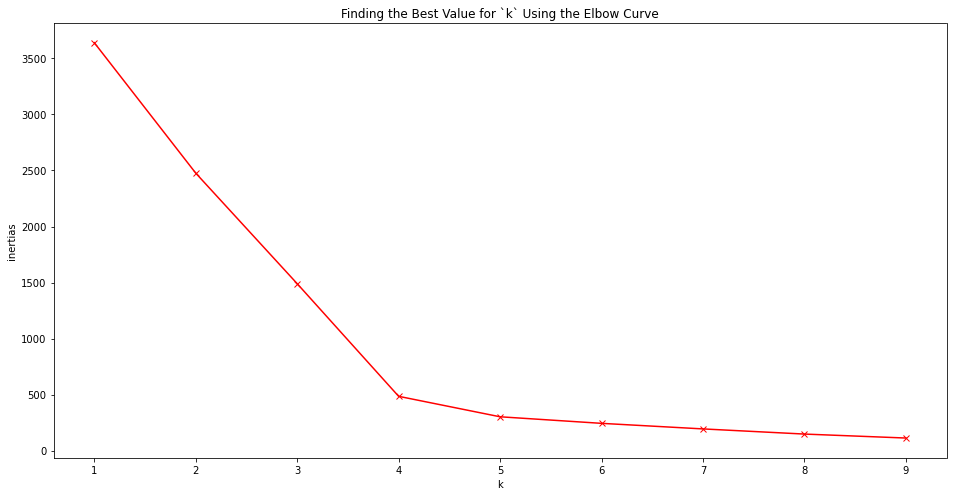

In [19]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'rx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('Finding the Best Value for `k` Using the Elbow Curve')
plt.show()

Running K-Means with `k=4`

In [20]:
# Initialize the K-Means model.
# YOUR CODE HERE
kmeanModel = KMeans(n_clusters=4)
# Fit the model
# YOUR CODE HERE
kmeanModel.fit(crypto_data_std_pca_df)

# Predict clusters
# YOUR CODE HERE
kmeanModel.predict(crypto_data_std_pca_df)

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [21]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
clustered_df=crypto_data.reset_index().drop('index',axis=1).merge(crypto_data_std_pca_df,left_index=True, right_index=True)
clustered_df['Class']=kmeanModel.predict(crypto_data_std_pca_df)
clustered_df=clustered_df.merge(crypto_data_names,left_index=True, right_index=True)
clustered_df


# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,Class,CoinName
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.368930,0.973577,-0.598311,1,42 Coin
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.352269,0.973711,-0.598740,1,404Coin
2,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.308791,1.654546,-0.674772,1,EliteCoin
3,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.133343,-1.334293,0.195764,0,Bitcoin
4,Ethash,PoW,1.076842e+08,0.000000e+00,-0.131143,-1.964967,0.407379,0,Ethereum
5,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.185696,-1.172693,-0.008501,0,Litecoin
6,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.391670,1.276155,-0.512539,1,Dash
7,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.144502,-2.190802,0.445697,0,Monero
8,Ethash,PoW,1.133597e+08,2.100000e+08,-0.129582,-1.965066,0.407357,0,Ethereum Classic
9,Equihash,PoW,7.383056e+06,2.100000e+07,-0.152981,-1.937008,0.385319,0,ZCash


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [22]:
clustered_df['Class']=pd.Categorical(clustered_df['Class'])
my_color=clustered_df['Class'].cat.codes

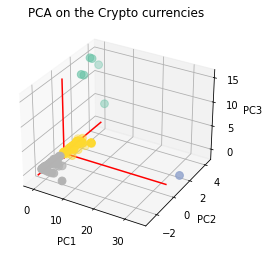

In [23]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df['PC 1'], clustered_df['PC 2'], clustered_df['PC 3'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(clustered_df['PC 1']), max(clustered_df['PC 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(clustered_df['PC 2']), max(clustered_df['PC 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(clustered_df['PC 3']), max(clustered_df['PC 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Crypto currencies")
plt.show()

In [37]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE
clustered_df.hvplot.table()

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,Class,CoinName]

In [25]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE
print("There are",clustered_df.shape[0],"tradable cryptocurrencies")

There are 532 tradable cryptocurrencies


In [26]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
scalar = MinMaxScaler()
clustered_df_scalr=scalar.fit_transform(clustered_df[['TotalCoinSupply','TotalCoinsMined']])
clustered_df_scalr

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [27]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE
plot_df=pd.DataFrame(clustered_df_scalr,columns=['TotalCoinSupply','TotalCoinsMined'])

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE
plot_df=plot_df.merge(crypto_data_names,left_index=True, right_index=True)
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE
plot_df['Class']=kmeanModel.predict(crypto_data_std_pca_df)
plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
0,4.200000e-11,0.000000,42 Coin,1
1,5.320000e-04,0.001066,404Coin,1
2,3.141593e-01,0.029576,EliteCoin,1
3,2.100000e-05,0.000018,Bitcoin,0
4,0.000000e+00,0.000109,Ethereum,0
5,8.400000e-05,0.000064,Litecoin,0
6,2.200000e-05,0.000009,Dash,1
7,0.000000e+00,0.000017,Monero,0
8,2.100000e-04,0.000115,Ethereum Classic,0
9,2.100000e-05,0.000007,ZCash,0


In [28]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
plot_df.hvplot.scatter(x='TotalCoinsMined', y='TotalCoinSupply',by='Class',legend='top', height=400, width=400)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)

## HV Plot is not displaying for some reason! will you matplotlib

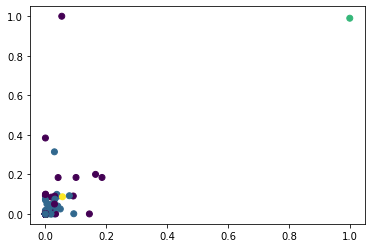

In [35]:
plt.scatter(plot_df.TotalCoinsMined, plot_df.TotalCoinSupply, c=plot_df.Class)
plt.show()